<a href="https://colab.research.google.com/github/MohammadErfanRashidi/BigMartSales/blob/main/BigMartSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [141]:
# Uploading the train data
dataset = pd.read_csv("/content/Train.csv")

In [142]:
# Printing the head
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [143]:
# Printing the tail
dataset.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [144]:
# Printing the shape
dataset.shape

(8523, 12)

In [145]:
# Describing the dataset
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [146]:
# Getting the info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [147]:
# Checking for missing values
dataset.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

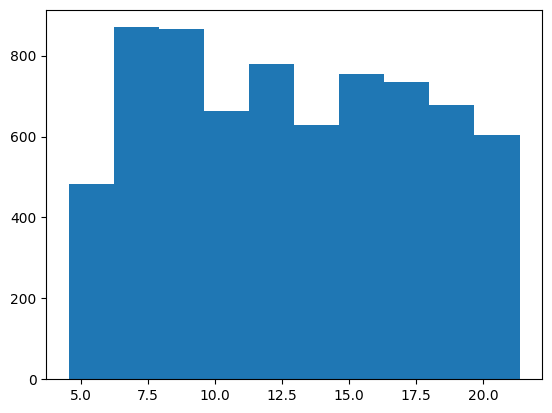

In [148]:
# Plotting the Item_Weight column
plt.hist(dataset['Item_Weight'])

In [149]:
# Filling the missing values by the mean
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(),inplace=True)

<ipython-input-149-418b26b4910a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(),inplace=True)


In [150]:
# Displaying the Outlet_Size column
dataset['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [151]:
# Filling the missing values by the most repeated value (Mode)
dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0],inplace=True)

<ipython-input-151-f1cb659037c3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0],inplace=True)


In [152]:
# Checking the missing values again
dataset.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [153]:
# Checking the object columns
dataset.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [154]:
# Gettint the value counts of each object column
print(dataset['Item_Fat_Content'].value_counts())
print(dataset['Item_Type'].value_counts())
print(dataset['Outlet_Identifier'].value_counts())
print(dataset['Outlet_Size'].value_counts())
print(dataset['Outlet_Location_Type'].value_counts())
print(dataset['Outlet_Type'].value_counts())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64
Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
Ou

In [155]:
# Encoding the object columns
le = LabelEncoder()
dataset['Item_Fat_Content'] = le.fit_transform(dataset['Item_Fat_Content'])
dataset['Item_Type'] = le.fit_transform(dataset['Item_Type'])
dataset['Outlet_Identifier'] = le.fit_transform(dataset['Outlet_Identifier'])
dataset['Outlet_Size'] = le.fit_transform(dataset['Outlet_Size'])
dataset['Outlet_Location_Type'] = le.fit_transform(dataset['Outlet_Location_Type'])
dataset['Outlet_Type'] = le.fit_transform(dataset['Outlet_Type'])

In [156]:
# Gettint the value counts of each object column again
print(dataset['Item_Fat_Content'].value_counts())
print(dataset['Item_Type'].value_counts())
print(dataset['Outlet_Identifier'].value_counts())
print(dataset['Outlet_Size'].value_counts())
print(dataset['Outlet_Location_Type'].value_counts())
print(dataset['Outlet_Type'].value_counts())

Item_Fat_Content
1    5089
2    2889
0     316
4     117
3     112
Name: count, dtype: int64
Item_Type
6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: count, dtype: int64
Outlet_Identifier
5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: count, dtype: int64
Outlet_Size
1    5203
2    2388
0     932
Name: count, dtype: int64
Outlet_Location_Type
2    3350
1    2785
0    2388
Name: count, dtype: int64
Outlet_Type
1    5577
0    1083
3     935
2     928
Name: count, dtype: int64


In [157]:
# Checking the info of again
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 799.2+ KB


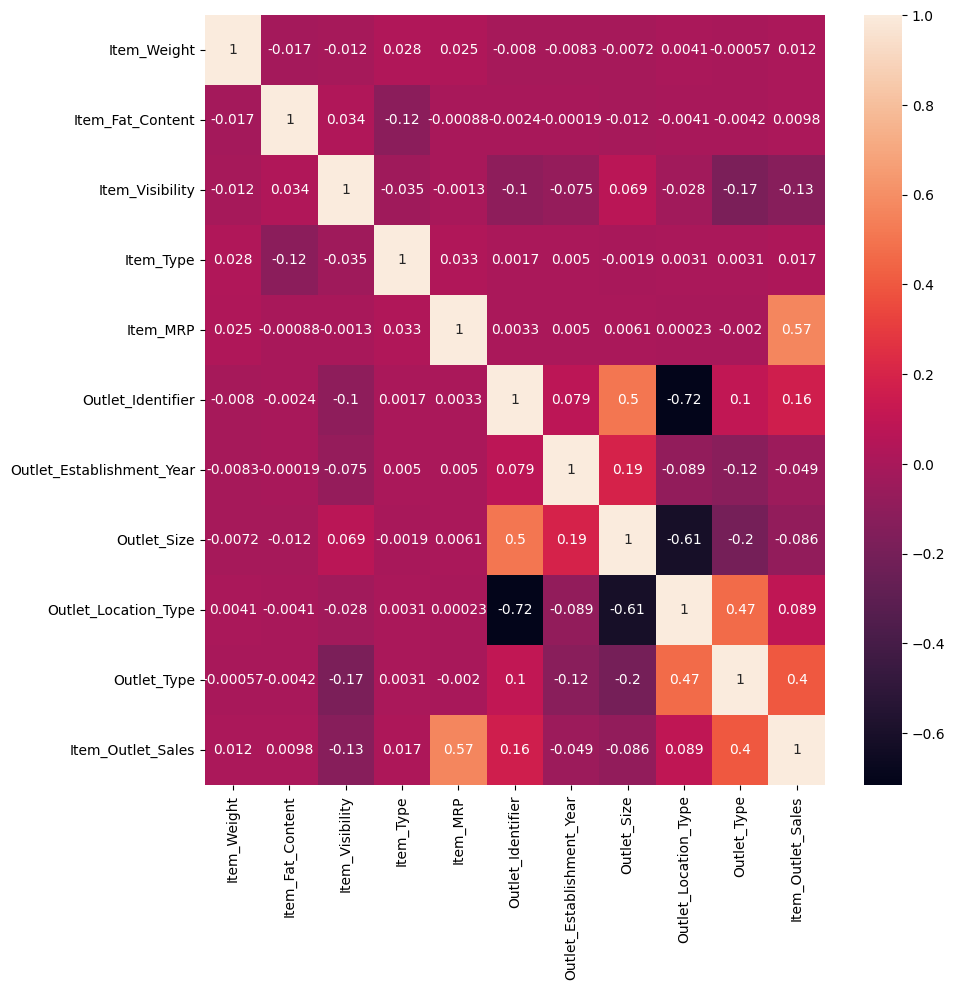

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all columns except 'Item_Outlet_Sales'
subset = dataset.drop('Item_Identifier', axis=1)

# Generate the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(subset.corr(), annot=True)
plt.show()

In [159]:
# Seperating the data and the sale price while excluding Item_Identifier column
X_train = dataset.drop(columns=['Item_Identifier','Item_Outlet_Sales'],axis=1)
Y_train = dataset['Item_Outlet_Sales']

In [160]:
print(X_train)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 1         0.016047          4  249.8092   
1           5.920                 2         0.019278         14   48.2692   
2          17.500                 1         0.016760         10  141.6180   
3          19.200                 2         0.000000          6  182.0950   
4           8.930                 1         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 1         0.056783         13  214.5218   
8519        8.380                 2         0.046982          0  108.1570   
8520       10.600                 1         0.035186          8   85.1224   
8521        7.210                 2         0.145221         13  103.1332   
8522       14.800                 1         0.044878         14   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0       

In [161]:
print(Y_train)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [162]:
# Modeling the RandomForest model
model = RandomForestRegressor()

In [163]:
# Fitting the model
model.fit(X_train, Y_train)

RandomForestRegressor()

In [164]:
# Evaluating the model (train)
model.score(X_train, Y_train)

0.9385662242824246

In [165]:
# Predicting on the train data
Y_pred = model.predict(X_train)

# Evaluating the model using R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)
r2 = metrics.r2_score(Y_train, Y_pred)
mae = metrics.mean_absolute_error(Y_train, Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred))

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

R-squared: 0.9385662242824246
Mean Absolute Error: 293.9540254846885
Root Mean Squared Error: 422.9454132210282


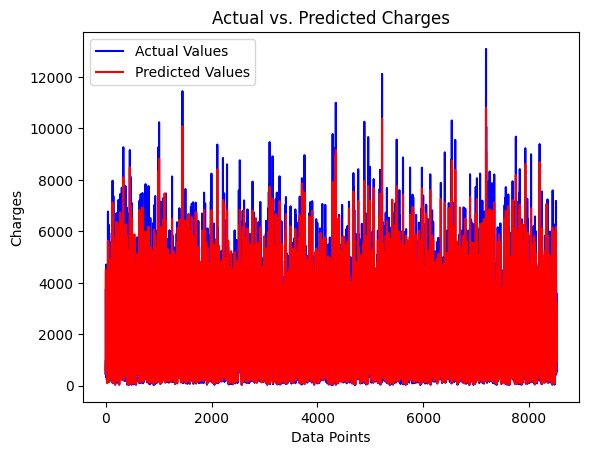

In [166]:
# Comparing the predicted values and actual values with separated plots
plt.plot(Y_train.values, label='Actual Values', color='blue')
plt.plot(Y_pred, label='Predicted Values', color='red')
plt.xlabel('Data Points')
plt.ylabel('Charges')
plt.title('Actual vs. Predicted Charges')
plt.legend()
plt.show()

In [167]:
# Uploading the test dataset
test_dataset = pd.read_csv("/content/Test.csv")

In [168]:
# Creating a copy of the dataset
test_dataset_copy = test_dataset.copy()

In [169]:
# Checking the head
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [170]:
# Getting the shape
test_dataset.shape

(5681, 11)

In [171]:
# Going through the same process as in the train dataset

In [172]:
# Checking for missing values
test_dataset.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [173]:
# Filling the missing values by the mean
test_dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(),inplace=True)

<ipython-input-173-93b692d775d4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(),inplace=True)


In [174]:
# Filling the missing values by the most repeated value (Mode)
test_dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0],inplace=True)

<ipython-input-174-4653c80844fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0],inplace=True)


In [175]:
# Checking the missing values again
test_dataset.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [176]:
# Getting the info
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [177]:
# Encoding the object columns
# We should convert Outlet_Size column into str because there is an int in this column
test_dataset['Outlet_Size'] = test_dataset['Outlet_Size'].astype(str)

test_dataset['Item_Fat_Content'] = le.fit_transform(test_dataset['Item_Fat_Content'])
test_dataset['Item_Type'] = le.fit_transform(test_dataset['Item_Type'])
test_dataset['Outlet_Identifier'] = le.fit_transform(test_dataset['Outlet_Identifier'])
test_dataset['Outlet_Size'] = le.fit_transform(test_dataset['Outlet_Size'])
test_dataset['Outlet_Location_Type'] = le.fit_transform(test_dataset['Outlet_Location_Type'])
test_dataset['Outlet_Type'] = le.fit_transform(test_dataset['Outlet_Type'])

In [178]:
# Separating the data and the label
X_test = test_dataset.drop(columns=['Item_Identifier'],axis=1)

In [179]:
# Predicting the Y_test
Y_test = model.predict(X_test)

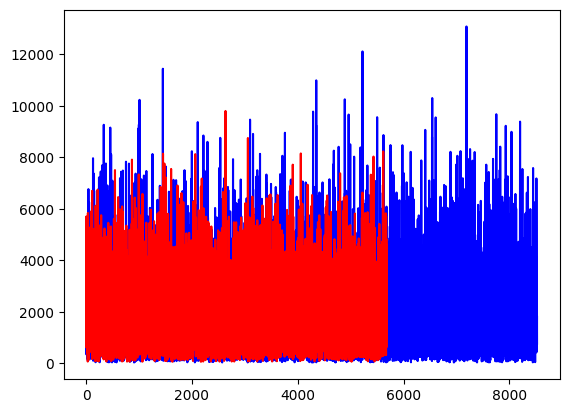

In [180]:
# Comparing Y_train and Y_test in one plot with different colors
plt.plot(Y_train.values, label='Y_train', color='blue')
plt.plot(Y_test, label='Y_test', color='red')

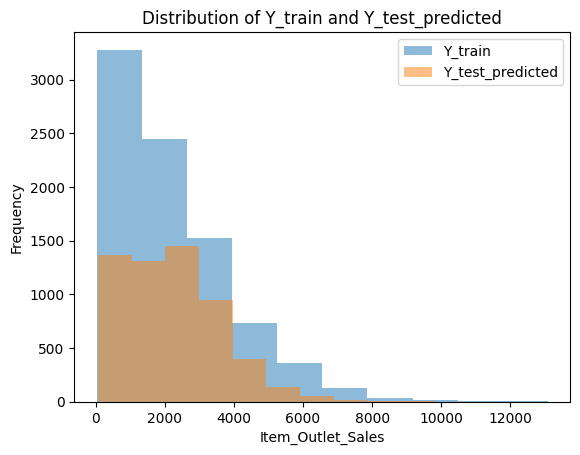

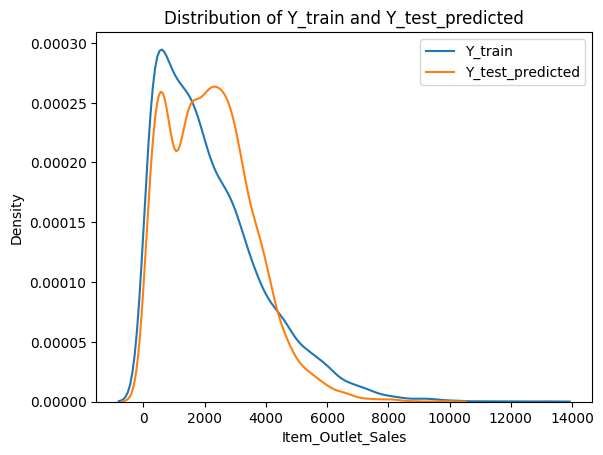

In [181]:
# Histogram
plt.hist(Y_train, alpha=0.5, label='Y_train')
plt.hist(Y_test, alpha=0.5, label='Y_test_predicted')
plt.legend(loc='upper right')
plt.title('Distribution of Y_train and Y_test_predicted')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

# Density Plot (using seaborn)
sns.kdeplot(Y_train, label='Y_train')
sns.kdeplot(Y_test, label='Y_test_predicted')
plt.legend(loc='upper right')
plt.title('Distribution of Y_train and Y_test_predicted')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Density')
plt.show()

In [182]:
print("Y_train Statistics:")
print(Y_train.describe())

print("\nY_test_predicted Statistics:")
print(pd.Series(Y_test).describe())

Y_train Statistics:
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Y_test_predicted Statistics:
count    5681.000000
mean     2209.416195
std      1389.707360
min        60.667696
25%      1098.709818
50%      2116.371802
75%      3087.627526
max      9805.003570
dtype: float64


In [183]:
# Calculating summary statistics for Y_train and Y_test_predicted
train_stats = Y_train.describe()
test_stats = pd.Series(Y_test).describe()

# Selecting the statistics
stats_to_compare = ['mean', 'std', 'min', 'max']

# Calculating percentage similarity for each statistic
similarity_percentages = {}

for stat in stats_to_compare:
    # Calculating the absolute difference between the statistic values
    diff = abs(train_stats[stat] - test_stats[stat])

    # Calculating the average value of the statistic for both datasets
    avg = (train_stats[stat] + test_stats[stat]) / 2

    # Calculating the percentage similarity
    similarity = (1 - (diff / avg)) * 100
    similarity_percentages[stat] = similarity

# Printing the results
for stat, percentage in similarity_percentages.items():
    print(f"Similarity for {stat}: {percentage:.2f}%")

Similarity for mean: 98.72%
Similarity for std: 79.54%
Similarity for min: 41.72%
Similarity for max: 71.33%


In [184]:
# Merging Y_test to test_dataset_copy with the name Item_Outlet_Sales
test_dataset_copy['Item_Outlet_Sales'] = Y_test

In [186]:
# Printing the head
test_dataset_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1735.634072
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1229.692652
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,637.303760
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2340.093918
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5705.945948


In [185]:
# Exporting test_dataset_copy as a csv file named Test_New.csv
test_dataset_copy.to_csv('Test_New.csv', index=False)